## Word Cloud Creation

---------------
##### _A recipe for beautiful word clouds (tag clouds) with Python and  the `wordcloud` module._

______


#### Introduction

Tag clouds (word clouds) are often used in modern data presentation to depict keyword tags or to visualize the number of occurences of  a particular keyword or phrase. While they are trendy and easy to do, word clouds should be used sparingly as an additional tool to the more traditional methods to present data. 

This recipe shows how to create a beautiful word cloud with Python and the `wordcloud` module. It also explores more advanced options like using a mask to shape the output, using colors, fonts, etc.


#### Process


In [24]:
import random
from collections import Counter
import psycopg2
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline

1. Fetch the data. 

In this case the source data is a list holding all job offer titles for ads that have a Python reference. 

In [16]:
conn = psycopg2.connect('dbname=jobsbg')
cur = conn.cursor()
cur.execute('SELECT jobs.name FROM jobs WHERE jobs.id IN (SELECT * FROM mv_job_ids_python_contents);')

result = cur.fetchall()
cur.close()
conn.close()

result[:5]

[('Software Engineer in Automation',),
 ('Java Software Engineer',),
 ('Data Analyst at Stremio',),
 ('Senior Electronics Engineer',),
 ('Experienced Web Developers',)]

2. Prepare a function for styling the individual labels.

Random color assignment from a provided template colors is used in this case.

In [21]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    """A callback function to style a word in a word cloud object with a random color."""
    
    colors = ['#FFD448','#EFCC4F','#E0C557','#D0BE5E','#C1B766','#B2AF6E','#A2A875',
              '#93A17D','#839A84','#74928C','#658B94','#55849B','#467DA3','#3776AB']
    return random.choice(colors)

3. Provide a path to the font to be used for the labels.

Some of the nicer looking ones that I tried are commented below.

In [22]:
# Candidate fonts:
font_path = '/usr/share/fonts/TTF/Oswald-SemiBold.ttf'
# /usr/share/fonts/TTF/FiraSansCompressed-Medium.ttf
# /usr/share/fonts/fira-sans-condensed/FiraSansCondensed-Black.ttf
# /usr/share/fonts/nerd-fonts-complete/ttf/Iosevka Term Heavy Nerd Font Complete.ttf
# /usr/share/fonts/jockey-one/JockeyOne-Regular.ttf
# /usr/share/fonts/londrina-solid/LondrinaSolid-Regular.ttf
# /usr/share/fonts/luckiest-guy/LuckiestGuy-Regular.ttf
# /usr/share/fonts/nerd-fonts-complete/ttf/Noto Sans Condensed Black Nerd Font Complete.ttf
# /usr/share/fonts/TTF/Oswald-SemiBold.ttf
# /usr/share/fonts/overlock/Overlock-Black.ttf
# /usr/share/fonts/passion-one/PassionOne-Regular.ttf
# /usr/share/fonts/saira-extracondensed/SairaExtraCondensed-SemiBold.ttf

4. Prepare the mask.

What is needed is basically an image with the mask (the area we want to fill with words) in black on a white background. We can prepare it programatically, or we can use an editor like Inkscape to prepare it.  The programatical approach can be seen [here](https://github.com/minimaxir/stylistic-word-clouds/blob/master/wordcloud_yelp_neg.py).  Since I had the icon needed contained in a font installed on the system, I chose an alternative approach to quickly create it using Inkscape: 
  - Create an empty project and open the document properties menu (`File` > `Document Properties`). 
  - Set the units to `px` and the custom size dimensions to whatever mask size we need (in this case 2048 x 2048 px).
  - In the same menu select a white background (255, 255, 255 ,255) with no transparency.
  - In the glyphs menu (`Text` > `Glyphs`) select the font that contains the icon to use and then find the icon and copy-paste it in the document.
  - Resize and place the icon glyph to the desired position on the canvas (in this case it is stretched to fully fit in the mask). Remove any stroke from the object and set the fill to black.
  - Export the file as `.png`. The mask is ready to use.
  
  
  5. Use the mask to prepare a `numpy` array.

In [31]:
icon = Image.open('../resources/python_mask.png')
mask = np.array(icon)

6. Add stopwords.

Stopwords are words that we want excluded from the word cloud. The `wordcloud` module comes with a default list in `wordcloud.WORDCLOUD`, and additional words can be added to it. 

In [32]:
stopwords = STOPWORDS
stopwords.add('')

7. Preparing the text.

`wordcloud` can take a text and create a word cloud from it automatically, or it can take a predefined frequencies object holding the data. The latter approach was more appealing to me visually. I used `collections.Counter` to generate the frequencies.

In [33]:
jobs_text = ' '.join(job_name[0].strip().upper() for job_name in result)

counter = Counter(jobs_text.split())
word_freq_dict = dict(counter)
len(word_freq_dict)

939

8. Prepare the `wordcloud` settings and generate the image.

In [34]:
wc = WordCloud(
    font_path = font_path,
    width = 920,
    height = 600,
    mask = mask,
    contour_width = 32,
    contour_color = '#3776ab',
    background_color = '#1c3b56',
    # colormap = 'viridis',  # Not used when color_func is specified
    color_func = color_func,
    max_words = 2000,
    min_font_size = 10,
    font_step = 1,
    max_font_size = 300, 
    random_state = 42,
    stopwords = stopwords,
    repeat = False)

In [37]:
# wc.generate_from_text(jobs_text)
wc.generate_from_frequencies(word_freq_dict)

9. Save the image and show in Jupyter Notebook

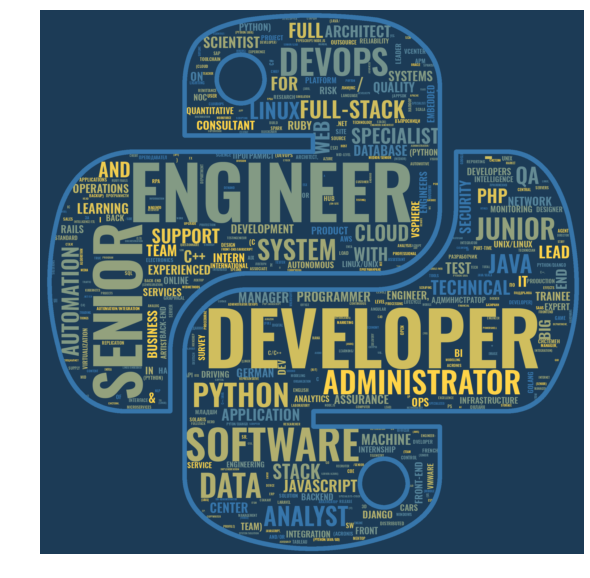

In [38]:
plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.imsave('../resources/python_wordcloud.png', wc)

#### Appendix: References and Resources Used

- https://amueller.github.io/word_cloud/  | The `wordcloud` module home repository.
- http://www.niemanlab.org/2011/10/word-clouds-considered-harmful/
- https://en.wikipedia.org/wiki/Tag_cloud

In [5]:
from IPython.core.display import HTML
with open('../resources/styles/python_style.css', 'r') as f:
    style = f.read()
HTML(style)